#### FT/Durham NW2-UHS AFM Processing Pipeline

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from topostats.io import find_files, read_yaml, write_yaml, LoadScans, save_array
from topostats.filters import Filters
from topostats.scars import remove_scars

In [2]:
BASE_DIR = Path("/Users/user/Documents/PhD/FT_afm")
# Adjust the file extension approriately.
FILE_EXT = ".jpk"
# Search for files one directory level up from the current notebooks
image_files = find_files(base_dir=BASE_DIR / "1 fast rt", file_ext=FILE_EXT)

print(BASE_DIR)
image_files

/Users/user/Documents/PhD/FT_afm


[PosixPath('/Users/user/Documents/PhD/FT_afm/1 fast rt/save-2023.10.19-09.45.14.831.jpk'),
 PosixPath('/Users/user/Documents/PhD/FT_afm/1 fast rt/save-2023.10.19-09.45.26.285.jpk'),
 PosixPath('/Users/user/Documents/PhD/FT_afm/1 fast rt/save-2023.10.19-09.45.37.738.jpk')]

[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] Extracting image from /Users/user/Documents/PhD/FT_afm/1 fast rt/save-2023.10.19-09.45.14.831.jpk
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] 1.953125e-09
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] [save-2023.10.19-09.45.14.831] Image added to processing.
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] Extracting image from /Users/user/Documents/PhD/FT_afm/1 fast rt/save-2023.10.19-09.45.26.285.jpk
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] 1.953125e-09
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] [save-2023.10.19-09.45.26.285] Image added to processing.
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] Extracting image from /Users/user/Documents/PhD/FT_afm/1 fast rt/save-2023.10.19-09.45.37.738.jpk
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] 1.953125e-09
[Wed, 08 Nov 2023 17:17:03] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] Image added to processing.


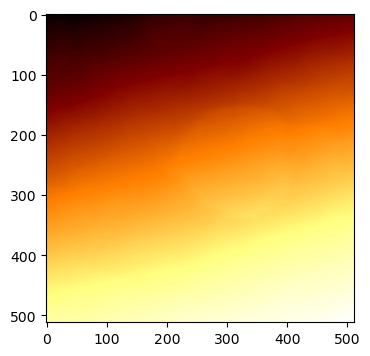

In [3]:
all_scan_data = LoadScans(image_files, channel="height_retrace")
data = all_scan_data.get_data()

# Plot the loaded scan in its raw format
fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(all_scan_data.image, cmap="afmhot")
plt.show()

In [4]:
# testing some TS filtering

filtered_image = Filters(
    image=all_scan_data.image,
    filename=all_scan_data.filename,
    pixel_to_nm_scaling=all_scan_data.pixel_to_nm_scaling,
    row_alignment_quantile=0.1,
    threshold_method='otsu',
    threshold_std_dev={'below': 10.0, 'above': 1.0},
    threshold_absolute={'below': -1.0, 'above': 1.0},
    gaussian_size=0,
    gaussian_mode=None,
    remove_scars={'run': 'true', 'removal_iterations': 2, 'threshold_low': 0.250, 'threshold_high': 0.666, 'max_scar_width': 4, 'min_scar_length': 16}
)

filtered_image.filter_image()

[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : Median flattening without mask
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : Plane tilt removal without mask
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : x-polyfit 1st order: [ 0.06988833 -3.70531741]
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : y-polyfit 1st order: [-6.49382948e-03  1.61520659e+01]
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : Removing x plane tilt
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : removing y plane tilt
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : Remove quadratic bow without mask
[Wed, 08 Nov 2023 17:17:04] [INFO    ] [topostats] [save-2023.10.19-09.45.37.738] : x polyfit 2nd order: [ 4.00853698e-06 -1.60690510e-03 -1.80611417e+00]
[Wed, 08 Nov 2

In [5]:
print(f"Available NumPy arrays to plot in filter_image.images dictionary :\n\n{filtered_image.images.keys()}")

Available NumPy arrays to plot in filter_image.images dictionary :

dict_keys(['pixels', 'initial_median_flatten', 'initial_tilt_removal', 'initial_quadratic_removal', 'initial_scar_removal', 'masked_median_flatten', 'masked_tilt_removal', 'masked_quadratic_removal', 'secondary_scar_removal', 'scar_mask', 'mask', 'zero_average_background', 'gaussian_filtered', 'initial_nonlinear_polynomial_removal', 'masked_nonlinear_polynomial_removal'])


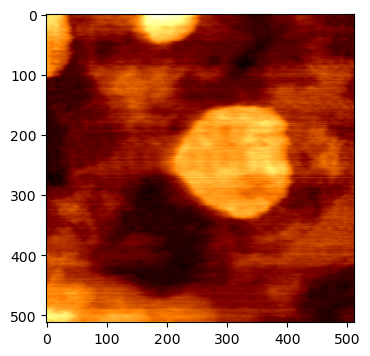

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(filtered_image.images["masked_nonlinear_polynomial_removal"], cmap="afmhot")
plt.show()